# Retirement Planner

---

## Environment Setup

In [5]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [6]:
# Set the random seed for resutls reproducibility (for testing purposes only)
np.random.seed(42)

---

## Portfolio Planner

In this activity, you will use the Alpaca API to grab historical data for a `60/40` portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [7]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [8]:
# Subset your tickers, then pull returns data:
# Set the ticker
ticker = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2019-12-31', tz='America/New_York').isoformat()

# Get 1 year's worth of historical data for SPY and AGG
df = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

# Drop unnecessary columns
df = df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

In [9]:
# Display sample data
df.head()

,AGG,SPY
,close,close
time,,
2019-01-02 00:00:00-05:00,106.585,249.89
2019-01-03 00:00:00-05:00,107.020,244.46
2019-01-04 00:00:00-05:00,106.695,252.41
2019-01-07 00:00:00-05:00,106.470,254.40
2019-01-08 00:00:00-05:00,106.420,256.65


---

## Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:

1. Calculate the daily returns for the SPY and AGG closing prices.

2. Calculate volatility for both the SPY and AGG closing prices.

3. Find the last day's closing price for both stocks and save those as variables

4. Run a Monte Carlo Simulation of at least `100` iterations and generate at least `30` years of closing prices

**Hint:** There are `252` trading days per year, so the number of records to generate for each Monte Carlo run will be `252 days * 30 years`.

In [10]:
daily_returns = df.pct_change().dropna()
daily_returns.head()

,AGG,SPY
,close,close
time,,
2019-01-03 00:00:00-05:00,0.004081,-0.021730
2019-01-04 00:00:00-05:00,-0.003037,0.032521
2019-01-07 00:00:00-05:00,-0.002109,0.007884
2019-01-08 00:00:00-05:00,-0.000470,0.008844
2019-01-09 00:00:00-05:00,0.000564,0.004130


In [11]:
# Compute daily volatility

daily_vol = daily_returns.std()
spy_vol = daily_vol["SPY"]["close"]
agg_vol = daily_vol["AGG"]["close"]

In [12]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
simulated_price_monte_carlo = pd.DataFrame()
portfolio_cumulative_returns=pd.DataFrame()

In [13]:
spy_last_price = df["SPY"]["close"][-1]
agg_last_price = df["AGG"]["close"][-1]

In [14]:
# Run the Monte Carlo Simulation

for n in range (number_simulations):
    
    print(f"Simulation number: {n}")
    
    simulated_AGG_prices= [agg_last_price]
    simulated_SPY_prices= [spy_last_price]
    
    
    for i in range(number_records):
        simulated_AGG_prices.append(simulated_AGG_prices[-1]*(1+ np.random.normal(daily_returns.mean()["AGG"]["close"],agg_vol )))
        simulated_SPY_prices.append(simulated_SPY_prices[-1]*(1+ np.random.normal(daily_returns.mean()["SPY"]["close"],spy_vol )))
        
        
    portfolio = pd.DataFrame({ 
    "AGG Prices": simulated_AGG_prices,
    "SPY Prices":simulated_SPY_prices})
       
    portfolio_returns = portfolio.pct_change()
    
    stock = 0.60
    bond = 0.40
    
    portfolio_returns = stock*portfolio_returns["SPY Prices"]+bond*portfolio_returns["AGG Prices"]

    portfolio_cumulative_returns[n]=(1+portfolio_returns.fillna(0)).cumprod()
    
    
portfolio_cumulative_returns

Simulation number: 0
Simulation number: 1
Simulation number: 2
Simulation number: 3
Simulation number: 4
Simulation number: 5
Simulation number: 6
Simulation number: 7
Simulation number: 8
Simulation number: 9
Simulation number: 10
Simulation number: 11
Simulation number: 12
Simulation number: 13
Simulation number: 14
Simulation number: 15
Simulation number: 16
Simulation number: 17
Simulation number: 18
Simulation number: 19
Simulation number: 20
Simulation number: 21
Simulation number: 22
Simulation number: 23
Simulation number: 24
Simulation number: 25
Simulation number: 26
Simulation number: 27
Simulation number: 28
Simulation number: 29
Simulation number: 30
Simulation number: 31
Simulation number: 32
Simulation number: 33
Simulation number: 34
Simulation number: 35
Simulation number: 36
Simulation number: 37
Simulation number: 38
Simulation number: 39
Simulation number: 40
Simulation number: 41
Simulation number: 42
Simulation number: 43
Simulation number: 44
Simulation number: 4

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000476,1.000536,0.998808,1.005394,1.011797,0.994452,0.997251,1.013277,1.000869,0.995376,...,1.002066,0.992709,1.001801,1.002671,0.996472,1.003160,1.001638,1.006800,0.998173,0.994765
2,1.008876,1.004699,1.003590,0.996711,1.009571,0.994247,0.994214,1.007199,1.000225,0.993036,...,1.005759,0.994517,1.003317,1.006181,0.997472,0.991774,1.002764,1.005408,0.996137,0.998871
3,1.008286,1.004228,1.003770,0.998232,1.007751,0.987669,0.998229,1.001361,1.000230,1.001279,...,1.006771,0.988444,1.004118,1.010565,0.993293,0.994454,1.008272,0.999144,0.998656,1.003328
4,1.013963,1.006575,1.008493,1.002636,1.013664,0.990972,1.003241,0.995491,1.002048,1.006036,...,1.004196,0.992123,1.004724,1.004423,0.994844,0.993782,1.005722,1.002248,0.996964,1.004095
5,1.016865,0.999694,1.001493,1.016174,1.011404,0.989529,1.007597,0.997137,1.010585,1.001112,...,1.001935,0.994918,0.996562,1.003819,0.995532,0.989139,0.987618,1.005462,0.995584,1.002235
6,1.014970,0.994634,1.002977,1.016080,1.008689,0.994838,1.002579,0.999368,1.010472,0.998744,...,1.009679,0.998872,0.995573,1.007189,0.989045,0.987965,0.995397,1.000197,0.996103,1.007646
7,1.006784,0.994940,1.011370,1.024488,1.010475,0.997587,1.002656,0.995781,1.006780,1.002243,...,1.007757,1.003213,1.002979,1.009484,0.991149,0.989242,0.996225,1.006241,0.990781,1.014262
8,1.003390,1.004256,1.011293,1.030078,1.007390,1.000017,0.998644,0.998111,1.004555,1.005715,...,1.010607,1.005153,1.003617,1.010355,0.992840,0.991361,1.002771,1.009447,0.992658,1.012774
9,1.004732,1.008167,1.008684,1.026804,1.000158,0.993488,1.003562,0.999380,1.007446,1.005680,...,1.000480,1.009968,1.012138,1.010410,0.997699,0.994002,1.013189,1.011004,0.987581,1.013328


In [15]:
# closing prices for 30 years.
portfolio.head()

,AGG Prices,SPY Prices
0,112.370000,321.920000
1,112.285503,319.272783
2,112.442762,321.170897
3,112.345729,323.744392
4,112.520977,323.820084


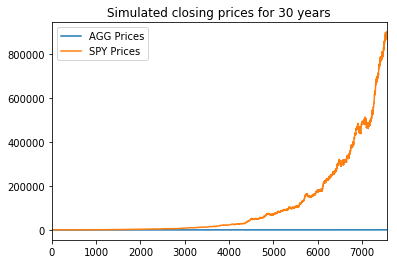

In [16]:
plot_title= f'Simulated closing prices for 30 years'
portfolio.plot(title= plot_title)

In [17]:
# Check that the simulation ran successfully
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000476,1.000536,0.998808,1.005394,1.011797,0.994452,0.997251,1.013277,1.000869,0.995376,...,1.002066,0.992709,1.001801,1.002671,0.996472,1.003160,1.001638,1.006800,0.998173,0.994765
2,1.008876,1.004699,1.003590,0.996711,1.009571,0.994247,0.994214,1.007199,1.000225,0.993036,...,1.005759,0.994517,1.003317,1.006181,0.997472,0.991774,1.002764,1.005408,0.996137,0.998871
3,1.008286,1.004228,1.003770,0.998232,1.007751,0.987669,0.998229,1.001361,1.000230,1.001279,...,1.006771,0.988444,1.004118,1.010565,0.993293,0.994454,1.008272,0.999144,0.998656,1.003328
4,1.013963,1.006575,1.008493,1.002636,1.013664,0.990972,1.003241,0.995491,1.002048,1.006036,...,1.004196,0.992123,1.004724,1.004423,0.994844,0.993782,1.005722,1.002248,0.996964,1.004095


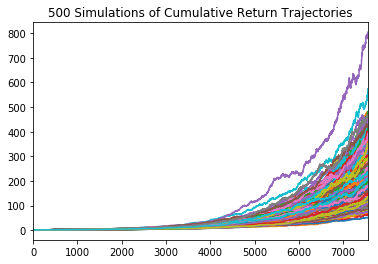

In [18]:
# Visualize the Simulation
plot_title= f"{n+1} Simulations of Cumulative Return Trajectories"
portfolio_cumulative_returns.plot(legend= None, title= plot_title)

In [19]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_cumulative_returns= portfolio_cumulative_returns.iloc[-1,:]
ending_cumulative_returns.head()

0    192.773859
1    171.964137
2    177.998514
3    138.466715
4    175.628015
Name: 7560, dtype: float64

In [20]:
# Display the 90% confidence interval for the ending returns(year 30)
confidence_interval= ending_cumulative_returns.quantile(q=[0.050, 0.95])
confidence_interval


0.05    102.825606
0.95    379.341808
Name: 7560, dtype: float64

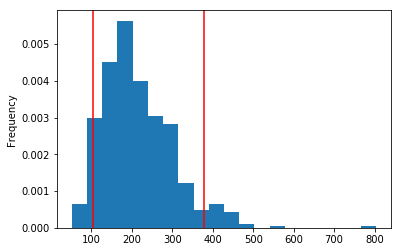

In [21]:
# Visualize the distribution of the ending returns( year 30)
plt.figure();
ending_cumulative_returns.plot(kind= 'hist', density=True, bins= 20)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

## Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at `30` years for the `10th`, `50th`, and `90th` percentiles?

2. Given an initial investment of `$20,000`, what is the expected return in dollars at the `10th`, `50th`, and `90th` percentiles?

3. Given the current projected annual income from the Plaid analysis, will a `4%` withdrawal rate meet or exceed that value at the `10th` percentile? Note: This is basically determining if retirement income is equivalent to current income.

4. How would a `50%` increase in the initial investment amount affect the `4%` retirement withdrawal? In other words, what happens if the initial investment had been bigger?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [22]:
# Compute cumulative returns

cumulative_returns_10th= ending_cumulative_returns.quantile(0.10)
cumulative_returns_50th= ending_cumulative_returns.quantile(.50)
cumulative_returns_90th= ending_cumulative_returns.quantile(.90)

print(f'The expected Cumulative Returns at 30 years for the 10th percentile are: {cumulative_returns_10th}')



The expected Cumulative Returns at 30 years for the 10th percentile are: 119.02748490144204


In [52]:
print(f'The expected Cumulative Returns at 30 years for the 50th percentile are: {cumulative_returns_50th}')

The expected Cumulative Returns at 30 years for the 50th percentile are: 199.0838571716875


In [53]:
print(f'The expected Cumulative Returns at 30 years for the 90th percentile are: {cumulative_returns_90th}')

The expected Cumulative Returns at 30 years for the 90th percentile are: 320.56154856359194


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [25]:
# Set initial investment
initial_investment= 20000
# Compute expected portfolio return
returns_at_10= initial_investment * cumulative_returns_10th

print(f'The expected Portfolio Returns for the 10th percentile are: $ {returns_at_10}')

The expected Portfolio Returns for the 10th percentile are: $ 2380549.6980288406


In [49]:
returns_at_50= initial_investment * cumulative_returns_50th

print(f'The expected Portfolio Returns for the 50th percentile are: $ {returns_at_50}')

The expected Portfolio Returns for the 50th percentile are: $ 3981677.14343375


In [50]:
returns_at_90= initial_investment * cumulative_returns_90th

print(f'The expected Portfolio Returns for the 90th percentile are: $ {returns_at_90}')

The expected Portfolio Returns for the 90th percentile are: $ 6411230.971271839


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [28]:
# Set Plaid's projected income
projected_yearly_income= 6085
initial_investment= 20000
# Calculate the 4% withdrawal for the ending return as retirement income
retirement_income= 0.04*(projected_yearly_income * ending_cumulative_returns.quantile(.10))
# Determine if the retirement income meets or exceeds the current projected income
retirement_income

28971.289825010994

The projected income 

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [29]:
# Re-calculate the retirement income with a 50% increase in the initial investment amount at 10%
investment= 30000

retirement_income_2=0.04*(investment * ending_cumulative_returns.quantile(.10))
print(f'The retirement income with a 50% increase in the initial investment at 10% is $ {retirement_income_2}')

The retirement income at in 10% is $ 142832.98188173046


In [35]:
# Re-calculate the retirement income with a 50% increase in the initial investment amount at 50%
investment= 30000

retirement_income_3=0.04*(investment * ending_cumulative_returns.quantile(.50))

print(f'The retirement income with a 50% increase in the initial investment at  50% is $ {retirement_income_3}')

The retirement income with a 50% increase in the initial investment at  50% is $ 238900.62860602498


In [55]:
# Re-calculate the retirement income with a 50% increase in the initial investment amount at 90%
investment= 30000

retirement_income_4=0.04*(investment * ending_cumulative_returns.quantile(.90))

print(f'The retirement income with a 50% increase in the initial investment at  90% is $ {retirement_income_4}')

The retirement income with a 50% increase in the initial investment at  90% is $ 384673.8582763103


### Optional Challenge

Use the Monte Carlo data and calculate the cumulative returns at the `5%`, `50%`, and `95%` quartiles and plot this data as a line chart to see how the cumulative returns change over the life of the investment.

In this section, you need to calculate and plot the cumulative returns for the median and `90%` confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [37]:
# Compute projected returns
cumulative_returns_5= portfolio_cumulative_returns.quantile(.05)
cumulative_returns_50= portfolio_cumulative_returns.quantile(.50)
cumulative_returns_95=portfolio_cumulative_returns.quantile(.95)
# Display sample data
cumulative_returns_5.head()

0    1.303270
1    1.373202
2    1.479372
3    1.314426
4    1.351576
Name: 0.05, dtype: float64

In [38]:
cumulative_returns_50.head()

0    11.970801
1    16.425693
2    10.501528
3    12.726322
4    19.451671
Name: 0.5, dtype: float64

In [40]:
cumulative_returns_95.head()

0    148.309071
1    132.255769
2    135.514988
3     88.645784
4    151.864963
Name: 0.95, dtype: float64

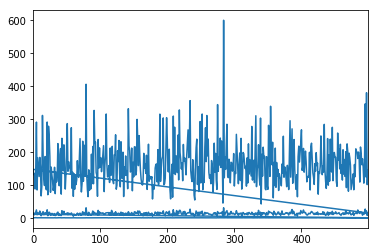

In [45]:
# Plot the cumulative returns over time
cumulative_returns_pct= pd.concat([cumulative_returns_5, cumulative_returns_50,cumulative_returns_95])
cumulative_returns_pct.plot(kind= 'line')

In [34]:
# Compute portfolio performance over time

# Plot projected performance over time


# FINANCIAL ANALYSIS

# Budget Analysis

### We ran a simulation of the next 30 years to simulate your currently investment portfolio. These were the results:

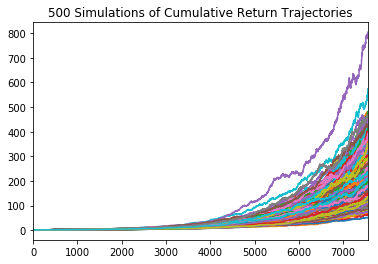

In [47]:
plot_title= f"{n+1} Simulations of Cumulative Return Trajectories"
portfolio_cumulative_returns.plot(legend= None, title= plot_title)

### The distribution of the results are as follows:

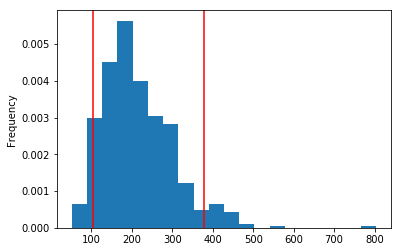

In [48]:
plt.figure();
ending_cumulative_returns.plot(kind= 'hist', density=True, bins= 20)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

## From the plot above we can tell the following:

### The expected Cumulative Returns at 30 years for the 10th percentile are: 119.03

### The expected Cumulative Returns at 30 years for the 50th percentile are: 199.08

### The expected Cumulative Returns at 30 years for the 90th percentile are: 320.56

## Given an initial investment of 20,000. The expected portfolio returns at 10, 50, and 90th percentile are: 

### The expected Portfolio Returns for the 10th percentile are: 2,380,549.70

### The expected Portfolio Returns for the 50th percentile are:  3,981,677.14

### The expected Portfolio Returns for the 90th percentile are:  6,411,230.97

## Retirement Income

### If 4% is withdrawn from the ending return your retirement income is 28,971.29

# What if you increase your initial investment of 20,000 by 50%? Well you can see the results below:

### The retirement income at in 10% is  142,832.99

### The retirement income with a 50% increase in the initial investment at  50% is 238,900.63.

### The retirement income with a 50% increase in the initial investment at  90% is 384,673.86

### Your portfolio return would be much higher than your retirement income. 